# Task 10 : Benchmark Top ML Algorithms

This task tests your ability to use different ML algorithms when solving a specific problem.


### Dataset
Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

Train: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv

Test: https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv

## Task Requirements
### You can have the following Classification models built using different ML algorithms
- Decision Tree
- KNN
- Logistic Regression
- SVM
- Random Forest
- Any other algorithm of your choice

### Use GridSearchCV for finding the best model with the best hyperparameters

- ### Build models
- ### Create Parameter Grid
- ### Run GridSearchCV
- ### Choose the best model with the best hyperparameter
- ### Give the best accuracy
- ### Also, benchmark the best accuracy that you could get for every classification algorithm asked above

#### Your final output will be something like this:
- Best algorithm accuracy
- Best hyperparameter accuracy for every algorithm

**Table 1 (Algorithm wise best model with best hyperparameter)**

Algorithm   |     Accuracy   |   Hyperparameters
- DT
- KNN
- LR
- SVM
- RF
- anyother

**Table 2 (Best overall)**

Algorithm    |   Accuracy    |   Hyperparameters



### Submission
- Submit Notebook containing all saved ran code with outputs
- Document with the above two tables

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [140]:
df_loan_train = pd.read_csv('https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_train.csv')
df_loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [141]:
df_loan_test = pd.read_csv('https://raw.githubusercontent.com/subashgandyer/datasets/main/loan_test.csv')
df_loan_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [142]:
df_loan_train.info(), df_loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Co

(None, None)

In [143]:
df_loan_train, df_loan_test = df_loan_train.drop(columns=['Loan_ID']), df_loan_test.drop(columns=['Loan_ID'])

In [144]:
df_loan_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [145]:
df_loan_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [146]:
perc_nan_train = pd.DataFrame(np.round(df_loan_train.isna().sum()/len(df_loan_train)*100,3),columns=['perc_nan'])
nan_train = pd.DataFrame(df_loan_train.isna().sum())
pd.concat([nan_train, perc_nan_train],axis=1)

,0,perc_nan
Gender,13,2.117
Married,3,0.489
Dependents,15,2.443
Education,0,0.000
Self_Employed,32,5.212
ApplicantIncome,0,0.000
CoapplicantIncome,0,0.000
LoanAmount,22,3.583
Loan_Amount_Term,14,2.280
Credit_History,50,8.143


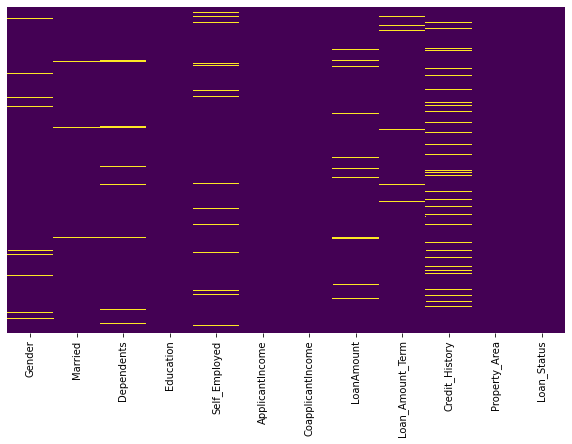

In [147]:
plt.figure(figsize=(10,6))
sns.heatmap(df_loan_train.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [148]:
perc_nan_test = pd.DataFrame(np.round(df_loan_test.isna().sum()/len(df_loan_test)*100,3),columns=['perc_nan'])
nan_test = pd.DataFrame(df_loan_test.isna().sum())
pd.concat([nan_test, perc_nan_test],axis=1)

,0,perc_nan
Gender,11,2.997
Married,0,0.000
Dependents,10,2.725
Education,0,0.000
Self_Employed,23,6.267
ApplicantIncome,0,0.000
CoapplicantIncome,0,0.000
LoanAmount,5,1.362
Loan_Amount_Term,6,1.635
Credit_History,29,7.902


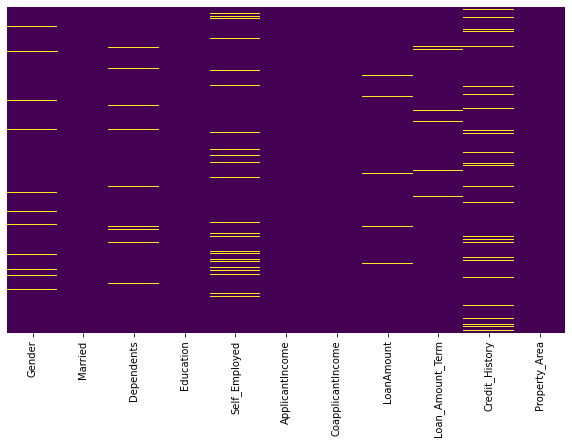

In [149]:
plt.figure(figsize=(10,6))
sns.heatmap(df_loan_test.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [150]:
# Concatinating both datasets into one 
df = df_loan_train.append(df_loan_test)
df.shape

(981, 12)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             957 non-null    object 
 1   Married            978 non-null    object 
 2   Dependents         956 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      926 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         954 non-null    float64
 8   Loan_Amount_Term   961 non-null    float64
 9   Credit_History     902 non-null    float64
 10  Property_Area      981 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 99.6+ KB


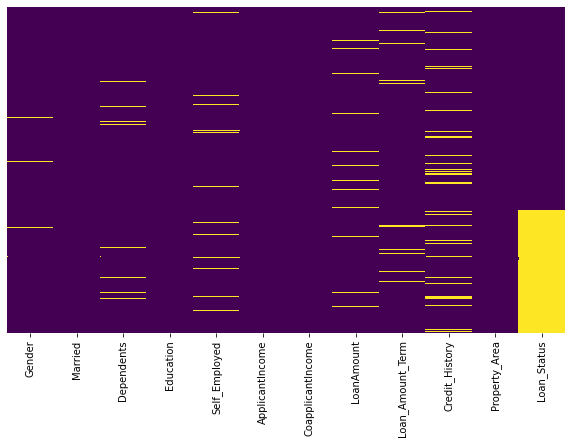

In [152]:
#plotting the missing values for concatinated dataset
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [153]:
#Categorical to numerical conversion
'''
    Gender
        1: Female
        0: Male
    Married
        1: Yes
        0: No
    Education
        1: Graduate
        0: Not Graduate
    Self_Employed
        1: Yes
        0: No
    Loan_Status
        1: Y
        0: N
'''
df['Gender'] = df['Gender'].replace({'Female': 1, 'Male': 0})
df['Married'] = df['Married'].replace({'Yes': 1, 'No': 0})
df['Education'] = df['Education'].replace({'Graduate': 1, 'Not Graduate': 0})
df['Self_Employed'] = df['Self_Employed'].replace({'Yes': 1, 'No': 0})
df['Loan_Status'] = df['Loan_Status'].replace({'Y': 1, 'N': 0})

df_object = df.select_dtypes(exclude='number')
df_dummy = pd.get_dummies(df_object)

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1.0
1,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0.0
2,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1.0
3,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1.0
4,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1.0


In [154]:
df = df.drop(['Dependents', 'Property_Area'], axis=1)
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1.0
1,0.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0.0
2,0.0,1.0,1,1.0,3000,0.0,66.0,360.0,1.0,1.0
3,0.0,1.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1.0
4,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1.0


In [155]:
#Both the columns have more than 2 types of categorical data
df = pd.concat([df, df_dummy], axis=1)
df

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1.0,1,0,0,0,0,0,1
1,0.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0,1,0,0,1,0,0
2,0.0,1.0,1,1.0,3000,0.0,66.0,360.0,1.0,1.0,1,0,0,0,0,0,1
3,0.0,1.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1.0,1,0,0,0,0,0,1
4,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0.0,1.0,0,1.0,4009,1777.0,113.0,360.0,1.0,NaN,0,0,0,1,0,0,1
363,0.0,1.0,1,0.0,4158,709.0,115.0,360.0,1.0,NaN,1,0,0,0,0,0,1
364,0.0,0.0,1,0.0,3250,1993.0,126.0,360.0,NaN,NaN,1,0,0,0,0,1,0
365,0.0,1.0,1,0.0,5000,2393.0,158.0,360.0,1.0,NaN,1,0,0,0,1,0,0


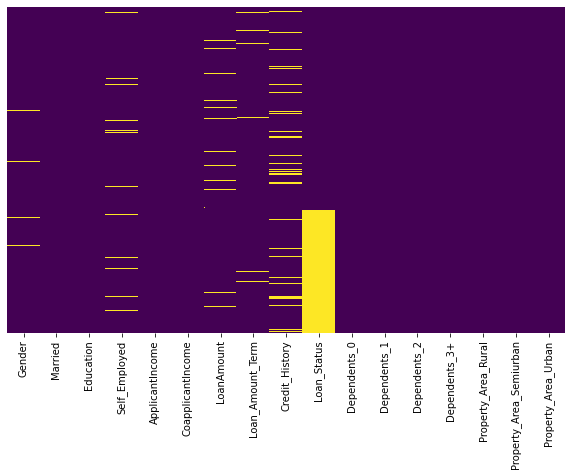

In [156]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap='viridis', yticklabels=False)

In [157]:
data = df.values

In [158]:
X = data[:, :-1]
y = data[:, -1]

In [159]:
# handling missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [160]:
imputer = IterativeImputer(max_iter=10, random_state=42)

In [161]:
imputer.fit(X)

IterativeImputer(random_state=42)

In [162]:
X_transform = imputer.transform(X)

In [163]:
print(f"Missing cells: {sum(np.isnan(X).flatten())}")
print(f"Missing cells: {sum(np.isnan(X_transform).flatten())}")

Missing cells: 575
Missing cells: 0


In [164]:
X.shape

(981, 16)

In [165]:
y.shape

(981,)

In [166]:
# From categorical to numeric values - TRAIN DATASET

'''
    Gender
        1: Female
        0: Male
    Married
        1: Yes
        0: No
    Education
        1: Graduate
        0: Not Graduate
    Self_Employed
        1: Yes
        0: No
    Loan_Status
        1: Y
        0: N
'''
df_loan_train['Gender'] = df_loan_train['Gender'].replace({'Female': 1, 'Male': 0})
df_loan_train['Married'] = df_loan_train['Married'].replace({'Yes': 1, 'No': 0})
df_loan_train['Education'] = df_loan_train['Education'].replace({'Graduate': 1, 'Not Graduate': 0})
df_loan_train['Self_Employed'] = df_loan_train['Self_Employed'].replace({'Yes': 1, 'No': 0})
df_loan_train['Loan_Status'] = df_loan_train['Loan_Status'].replace({'Y': 1, 'N': 0})

df_object_train = df_loan_train.select_dtypes(exclude='number')
df_dummy_train = pd.get_dummies(df_object_train)

df_loan_train.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1
1,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1
3,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1


In [167]:
# drop Dependents and Property_Area
df_loan_train = df_loan_train.drop(['Dependents', 'Property_Area'], axis=1)
df_loan_train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1
1,0.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,0.0,1.0,1,1.0,3000,0.0,66.0,360.0,1.0,1
3,0.0,1.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1
4,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1


In [168]:
df_loan_train = pd.concat([df_loan_train, df_dummy_train], axis=1)
df_loan_train

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1,1,0,0,0,0,0,1
1,0.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0,1,0,0,1,0,0
2,0.0,1.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,0,1
3,0.0,1.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,0,0,1
4,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,1,1,0,0,0,1,0,0
610,0.0,1.0,1,0.0,4106,0.0,40.0,180.0,1.0,1,0,0,0,1,1,0,0
611,0.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,1,0,1,0,0,0,0,1
612,0.0,1.0,1,0.0,7583,0.0,187.0,360.0,1.0,1,0,0,1,0,0,0,1


In [169]:
# From categorical to numeric values - TEST DATASET

'''
    Gender
        1: Female
        0: Male
    Married
        1: Yes
        0: No
    Education
        1: Graduate
        0: Not Graduate
    Self_Employed
        1: Yes
        0: No
'''
df_loan_test['Gender'] = df_loan_test['Gender'].replace({'Female': 1, 'Male': 0})
df_loan_test['Married'] = df_loan_test['Married'].replace({'Yes': 1, 'No': 0})
df_loan_test['Education'] = df_loan_test['Education'].replace({'Graduate': 1, 'Not Graduate': 0})
df_loan_test['Self_Employed'] = df_loan_test['Self_Employed'].replace({'Yes': 1, 'No': 0})

df_object_test = df_loan_test.select_dtypes(exclude='number')
df_dummy_test = pd.get_dummies(df_object_test)

df_loan_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,1,0,1,0.0,5720,0,110.0,360.0,1.0,Urban
1,0.0,1,1,1,0.0,3076,1500,126.0,360.0,1.0,Urban
2,0.0,1,2,1,0.0,5000,1800,208.0,360.0,1.0,Urban
3,0.0,1,2,1,0.0,2340,2546,100.0,360.0,NaN,Urban
4,0.0,0,0,0,0.0,3276,0,78.0,360.0,1.0,Urban


In [170]:
df_loan_test = df_loan_test.drop(['Dependents', 'Property_Area'], axis=1)
df_loan_test.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.0,1,1,0.0,5720,0,110.0,360.0,1.0
1,0.0,1,1,0.0,3076,1500,126.0,360.0,1.0
2,0.0,1,1,0.0,5000,1800,208.0,360.0,1.0
3,0.0,1,1,0.0,2340,2546,100.0,360.0,NaN
4,0.0,0,0,0.0,3276,0,78.0,360.0,1.0


In [171]:
df_loan_test = pd.concat([df_loan_test, df_dummy_test], axis=1)
df_loan_test

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1,1,0.0,5720,0,110.0,360.0,1.0,1,0,0,0,0,0,1
1,0.0,1,1,0.0,3076,1500,126.0,360.0,1.0,0,1,0,0,0,0,1
2,0.0,1,1,0.0,5000,1800,208.0,360.0,1.0,0,0,1,0,0,0,1
3,0.0,1,1,0.0,2340,2546,100.0,360.0,NaN,0,0,1,0,0,0,1
4,0.0,0,0,0.0,3276,0,78.0,360.0,1.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0.0,1,0,1.0,4009,1777,113.0,360.0,1.0,0,0,0,1,0,0,1
363,0.0,1,1,0.0,4158,709,115.0,360.0,1.0,1,0,0,0,0,0,1
364,0.0,0,1,0.0,3250,1993,126.0,360.0,NaN,1,0,0,0,0,1,0
365,0.0,1,1,0.0,5000,2393,158.0,360.0,1.0,1,0,0,0,1,0,0


In [172]:
df_loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   601 non-null    float64
 1   Married                  611 non-null    float64
 2   Education                614 non-null    int64  
 3   Self_Employed            582 non-null    float64
 4   ApplicantIncome          614 non-null    int64  
 5   CoapplicantIncome        614 non-null    float64
 6   LoanAmount               592 non-null    float64
 7   Loan_Amount_Term         600 non-null    float64
 8   Credit_History           564 non-null    float64
 9   Loan_Status              614 non-null    int64  
 10  Dependents_0             614 non-null    uint8  
 11  Dependents_1             614 non-null    uint8  
 12  Dependents_2             614 non-null    uint8  
 13  Dependents_3+            614 non-null    uint8  
 14  Property_Area_Rural      6

In [173]:
df_loan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   356 non-null    float64
 1   Married                  367 non-null    int64  
 2   Education                367 non-null    int64  
 3   Self_Employed            344 non-null    float64
 4   ApplicantIncome          367 non-null    int64  
 5   CoapplicantIncome        367 non-null    int64  
 6   LoanAmount               362 non-null    float64
 7   Loan_Amount_Term         361 non-null    float64
 8   Credit_History           338 non-null    float64
 9   Dependents_0             367 non-null    uint8  
 10  Dependents_1             367 non-null    uint8  
 11  Dependents_2             367 non-null    uint8  
 12  Dependents_3+            367 non-null    uint8  
 13  Property_Area_Rural      367 non-null    uint8  
 14  Property_Area_Semiurban  3

In [174]:
train_labels = np.array(df_loan_train.pop('Loan_Status'))

In [175]:
data_train = df_loan_train.values
data_test = df_loan_test.values

In [176]:
imputer.fit(data_train)
imputer.fit(data_test)

IterativeImputer(random_state=42)

In [177]:
train_transform = imputer.transform(data_train)
test_transform = imputer.transform(data_test)

In [178]:
print(f"Missing cells: {sum(np.isnan(data_train).flatten())}")
print(f"Missing cells: {sum(np.isnan(train_transform).flatten())}")

Missing cells: 134
Missing cells: 0


In [179]:
print(f"Missing cells: {sum(np.isnan(data_test).flatten())}")
print(f"Missing cells: {sum(np.isnan(test_transform).flatten())}")

Missing cells: 74
Missing cells: 0


**Splitting the data into train and test set**

In [181]:
train_labels.shape

(614,)

In [182]:
from sklearn.model_selection import train_test_split

'''
test = test_transform
# test_labels 
train = train_transform
train_labels
'''

train, test, train_labels, test_labels = train_test_split(train_transform, train_labels, 
                                                          stratify = train_labels,
                                                          test_size = 0.3, 
                                                          random_state = 42)

In [183]:
print(test.shape)
print(train_labels.shape)
print(test_labels.shape)
print(train.shape)

(185, 16)
(429,)
(185,)
(429, 16)


In [186]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV


**DECISON TREE**

In [187]:
tree_para = {'criterion':['gini','entropy','log_loss'],'splitter':['best', 'random'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,23,30,40,50,70,90,120,150]}
tree = DecisionTreeClassifier(random_state=42)
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf.fit(train, train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
190 fits failed out of a total of 570.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
190 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'

  warnings.warn(some_fits_failed_m

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 23,
                                       30, 40, 50, 70, 90, 120, 150],
                         'splitter': ['best', 'random']})

In [188]:
print(f'Decision tree has {clf.best_params_}')

Decision tree has {'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}


In [189]:
# Make probability predictions
train_probs = clf.predict_proba(train)[:, 1]
probs = clf.predict_proba(test)[:, 1]

train_predictions = clf.predict(train)
predictions = clf.predict(test)

In [190]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, accuracy_score

print(f'Train ROC AUC Score: {roc_auc_score(train_labels, train_probs)}')

Train ROC AUC Score: 0.8087654945610928


In [191]:
results = {}
results['recall'] = recall_score(test_labels, predictions)
results['precision'] = precision_score(test_labels, predictions)
results['roc'] = roc_auc_score(test_labels, predictions)
results['accuracy_score'] = accuracy_score(test_labels, predictions)

In [192]:
results

{'recall': 0.9133858267716536,
 'precision': 0.8226950354609929,
 'roc': 0.7411756720065165,
 'accuracy_score': 0.8054054054054054}

**KNN**

In [193]:
from sklearn.neighbors import KNeighborsClassifier

In [198]:
knn_para = {'n_neighbors': [3, 5, 11, 19], 'weights':['uniform', 'distance'], 'metric': ['euclidean', 'manhattan'], 'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'] }

In [199]:
gs = GridSearchCV(KNeighborsClassifier(), knn_para, verbose=1, cv=3, n_jobs=-1)

In [200]:
gs.fit(train, train_labels)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [201]:
print(f'KNN has {gs.best_params_}')

KNN has {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}


In [202]:
train_probs = gs.predict_proba(train)[:, 1]
probs = gs.predict_proba(test)[:, 1]

train_predictions = gs.predict(train)
predictions = gs.predict(test)

In [203]:
print(f'Train ROC AUC Score: {roc_auc_score(train_labels, train_probs)}')

Train ROC AUC Score: 0.6022641032127499


In [204]:
results = {}
results['recall'] = recall_score(test_labels, predictions)
results['precision'] = precision_score(test_labels, predictions)
results['roc'] = roc_auc_score(test_labels, predictions)
results['accuracy_score'] = accuracy_score(test_labels, predictions)

In [205]:
results

{'recall': 0.9448818897637795,
 'precision': 0.6976744186046512,
 'roc': 0.5241650828129243,
 'accuracy_score': 0.6810810810810811}

**LOGISTIC REGRESSION**

In [207]:
from sklearn.linear_model import LogisticRegression
lr_para = {"C":np.logspace(-3,3,7), "penalty":['l1','l2','elasticnet', 'none']} # l1 lasso l2 ridge
gs = GridSearchCV(LogisticRegression(), lr_para, verbose=1, cv=10, n_jobs=-1)
gs.fit(train, train_labels)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
140 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solv

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             verbose=1)

In [208]:
print(f'Logistic Regression has {gs.best_params_}')

Logistic Regression has {'C': 100.0, 'penalty': 'l2'}


In [209]:
train_probs = gs.predict_proba(train)[:, 1]
probs = gs.predict_proba(test)[:, 1]

train_predictions = gs.predict(train)
predictions = gs.predict(test)

In [210]:
print(f'Train ROC AUC Score: {roc_auc_score(train_labels, train_probs)}')

Train ROC AUC Score: 0.7695674171515304


In [211]:
results = {}
results['recall'] = recall_score(test_labels, predictions)
results['precision'] = precision_score(test_labels, predictions)
results['roc'] = roc_auc_score(test_labels, predictions)
results['accuracy_score'] = accuracy_score(test_labels, predictions)

In [212]:
results

{'recall': 0.984251968503937,
 'precision': 0.8389261744966443,
 'roc': 0.7852294325278306,
 'accuracy_score': 0.8594594594594595}

**SVM**

In [213]:
from sklearn.svm import SVC
svm_para = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
gs = GridSearchCV(SVC(), svm_para, verbose=1, cv=3, n_jobs=-1)
gs.fit(train, train_labels)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')}, verbose=1)

In [214]:
print(f'SVM has {gs.best_params_}')

SVM has {'C': 10, 'kernel': 'linear'}


In [215]:
train_predictions = gs.predict(train)
predictions = gs.predict(test)

In [216]:
print(f'Train ROC AUC Score: {roc_auc_score(train_labels, train_probs)}')

Train ROC AUC Score: 0.7695674171515304


In [217]:
results = {}
results['recall'] = recall_score(test_labels, predictions)
results['precision'] = precision_score(test_labels, predictions)
results['roc'] = roc_auc_score(test_labels, predictions)
results['accuracy_score'] = accuracy_score(test_labels, predictions)

In [218]:
results

{'recall': 0.9212598425196851,
 'precision': 0.7905405405405406,
 'roc': 0.6933885419494977,
 'accuracy_score': 0.7783783783783784}

**RF**

In [219]:
from sklearn.ensemble import RandomForestClassifier

In [223]:
rf_para = { 
    'n_estimators': [10, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy', 'log_loss']
}

In [224]:
gs = GridSearchCV(RandomForestClassifier(), rf_para, verbose=1, cv=2, n_jobs=-1)

In [225]:
gs.fit(train, train_labels)

Fitting 2 folds for each of 135 candidates, totalling 270 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/par

GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]},
             verbose=1)

In [226]:
print(f'Random Forest has {gs.best_params_}')

Random Forest has {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 50}


In [227]:
train_probs = gs.predict_proba(train)[:, 1]
probs = gs.predict_proba(test)[:, 1]

train_predictions = gs.predict(train)
predictions = gs.predict(test)

In [228]:
print(f'Train ROC AUC Score: {roc_auc_score(train_labels, train_probs)}')

Train ROC AUC Score: 0.938957753604857


In [229]:
results = {}
results['recall'] = recall_score(test_labels, predictions)
results['precision'] = precision_score(test_labels, predictions)
results['roc'] = roc_auc_score(test_labels, predictions)
results['accuracy_score'] = accuracy_score(test_labels, predictions)

In [230]:
results

{'recall': 0.9763779527559056,
 'precision': 0.8266666666666667,
 'roc': 0.76405104534347,
 'accuracy_score': 0.8432432432432433}

In [235]:
from xgboost import XGBClassifier
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [6],
              'min_child_weight': [11],
              'silent': [1],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [5], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [1337]}
clf = GridSearchCV(XGBClassifier(), parameters, n_jobs=5, 
                   cv=3, 
                   scoring='roc_auc',
                   verbose=2, refit=True)
clf.fit(train, train_labels)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=XGBClassifier(), n_jobs=5,
             param_grid={'colsample_bytree': [0.7], 'learning_rate': [0.05],
                         'max_depth': [6], 'min_child_weight': [11],
                         'missing': [-999], 'n_estimators': [5], 'nthread': [4],
                         'objective': ['binary:logistic'], 'seed': [1337],
                         'silent': [1], 'subsample': [0.8]},
             scoring='roc_auc', verbose=2)

In [236]:
print(f'XGBoost has {clf.best_params_}')

XGBoost has {'colsample_bytree': 0.7, 'learning_rate': 0.05, 'max_depth': 6, 'min_child_weight': 11, 'missing': -999, 'n_estimators': 5, 'nthread': 4, 'objective': 'binary:logistic', 'seed': 1337, 'silent': 1, 'subsample': 0.8}


In [237]:
train_probs = clf.predict_proba(train)[:, 1]
probs = clf.predict_proba(test)[:, 1]

train_predictions = clf.predict(train)
predictions = clf.predict(test)

In [238]:
print(f'Train ROC AUC Score: {roc_auc_score(train_labels, train_probs)}')

Train ROC AUC Score: 0.8391980774095623


In [239]:
results = {}
results['recall'] = recall_score(test_labels, predictions)
results['precision'] = precision_score(test_labels, predictions)
results['roc'] = roc_auc_score(test_labels, predictions)
results['accuracy_score'] = accuracy_score(test_labels, predictions)

In [240]:
results

{'recall': 0.968503937007874,
 'precision': 0.831081081081081,
 'roc': 0.7687347271246268,
 'accuracy_score': 0.8432432432432433}